In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "8"

In [7]:
import numpy as np

from bench_mark import *
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
def get_best(history):
    return [np.max(h['log']['auc-mean']) for h in history]

def get_best_iteration(history):
    return [np.argmax(h['log']['auc-mean']) for h in history]


In [13]:
results = {}

Running experiments on dataset adult


  0%|          | 0/9 [00:00<?, ?it/s]

Baseline best auc: [0.929536858892422]
Running SGB


  0%|          | 0/9 [00:00<?, ?it/s]

Running MVS Adaptive


  0%|          | 0/9 [00:00<?, ?it/s]

Running MVS


  0%|          | 0/9 [00:00<?, ?it/s]

Running Goss


100%|██████████| 9/9 [01:06<00:00,  7.43s/it]


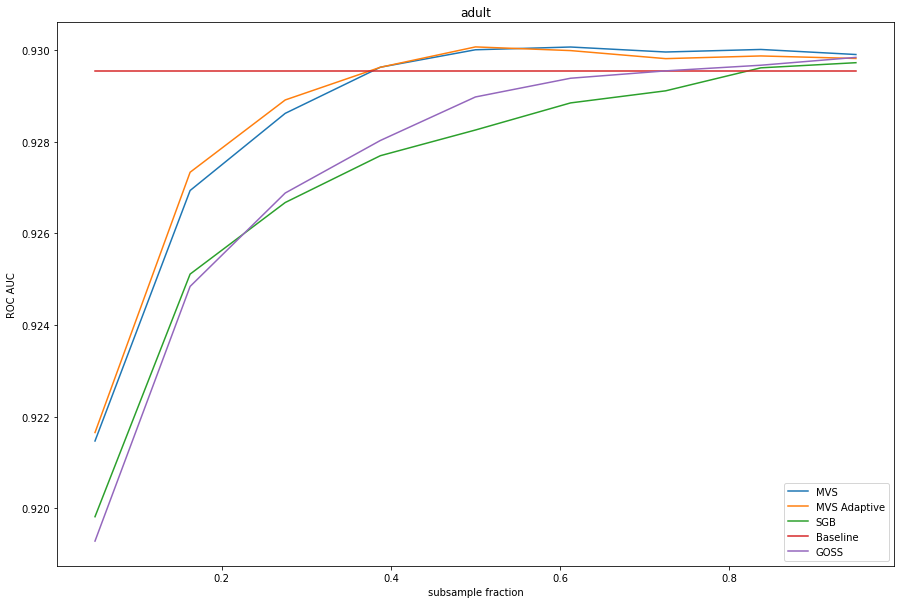

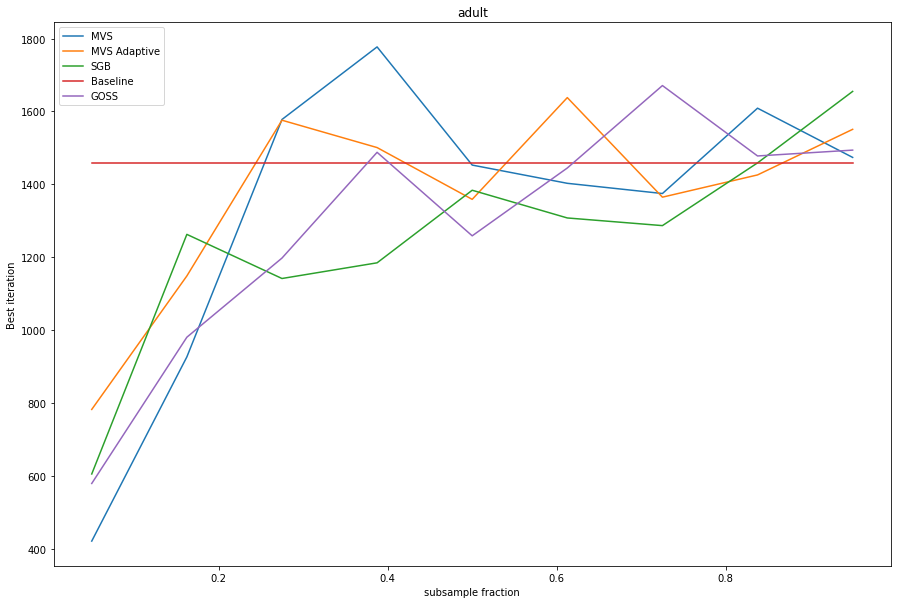

Running experiments on dataset internet
Baseline best auc: [0.9565311017059444]
Running SGB


100%|██████████| 9/9 [00:36<00:00,  4.08s/it]


Running MVS Adaptive


100%|██████████| 9/9 [00:48<00:00,  5.41s/it]


Running MVS


100%|██████████| 9/9 [00:49<00:00,  5.55s/it]


Running Goss


100%|██████████| 9/9 [00:39<00:00,  4.37s/it]


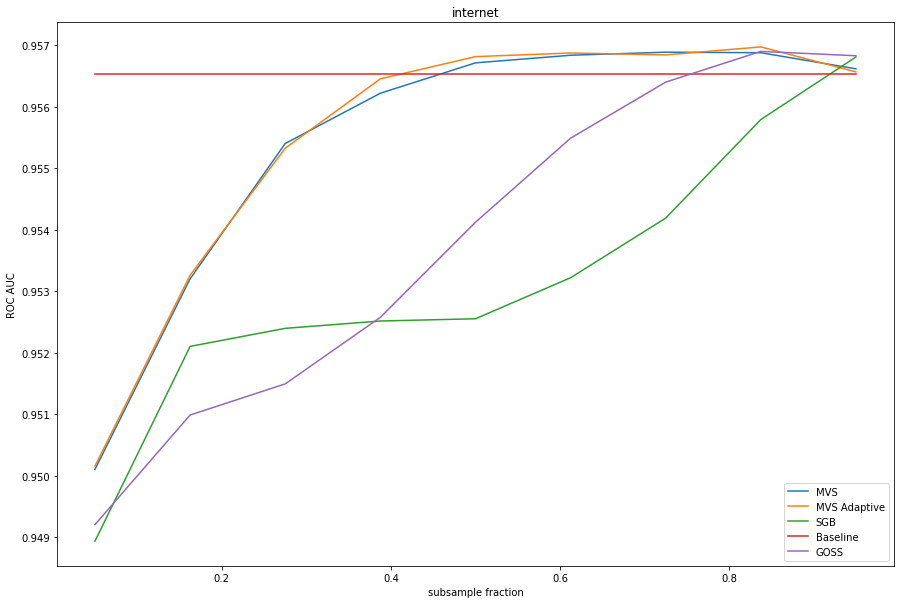

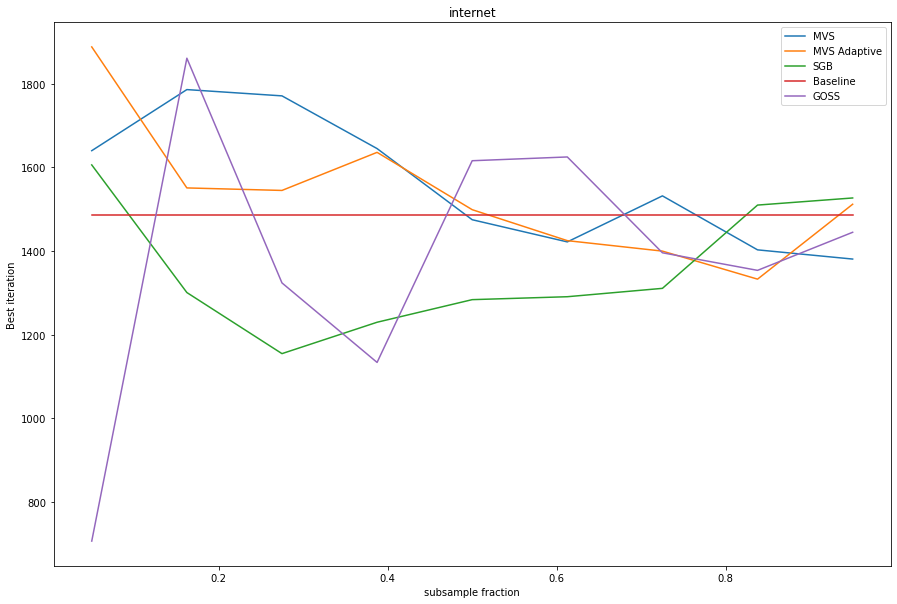

Running experiments on dataset amazon
[('ACTION', 2), ('RESOURCE', 7518), ('MGR_ID', 4243), ('ROLE_ROLLUP_1', 128), ('ROLE_ROLLUP_2', 177), ('ROLE_DEPTNAME', 449), ('ROLE_TITLE', 343), ('ROLE_FAMILY_DESC', 2358), ('ROLE_FAMILY', 67), ('ROLE_CODE', 343)]


  0%|          | 0/9 [00:00<?, ?it/s]

Baseline best auc: [0.8434582232980075]
Running SGB
[('ACTION', 2), ('RESOURCE', 7518), ('MGR_ID', 4243), ('ROLE_ROLLUP_1', 128), ('ROLE_ROLLUP_2', 177), ('ROLE_DEPTNAME', 449), ('ROLE_TITLE', 343), ('ROLE_FAMILY_DESC', 2358), ('ROLE_FAMILY', 67), ('ROLE_CODE', 343)]


  0%|          | 0/9 [00:00<?, ?it/s]

Running MVS Adaptive
[('ACTION', 2), ('RESOURCE', 7518), ('MGR_ID', 4243), ('ROLE_ROLLUP_1', 128), ('ROLE_ROLLUP_2', 177), ('ROLE_DEPTNAME', 449), ('ROLE_TITLE', 343), ('ROLE_FAMILY_DESC', 2358), ('ROLE_FAMILY', 67), ('ROLE_CODE', 343)]


  0%|          | 0/9 [00:00<?, ?it/s]

Running MVS
[('ACTION', 2), ('RESOURCE', 7518), ('MGR_ID', 4243), ('ROLE_ROLLUP_1', 128), ('ROLE_ROLLUP_2', 177), ('ROLE_DEPTNAME', 449), ('ROLE_TITLE', 343), ('ROLE_FAMILY_DESC', 2358), ('ROLE_FAMILY', 67), ('ROLE_CODE', 343)]


  0%|          | 0/9 [00:00<?, ?it/s]

Running Goss
[('ACTION', 2), ('RESOURCE', 7518), ('MGR_ID', 4243), ('ROLE_ROLLUP_1', 128), ('ROLE_ROLLUP_2', 177), ('ROLE_DEPTNAME', 449), ('ROLE_TITLE', 343), ('ROLE_FAMILY_DESC', 2358), ('ROLE_FAMILY', 67), ('ROLE_CODE', 343)]


100%|██████████| 9/9 [01:27<00:00,  9.78s/it]


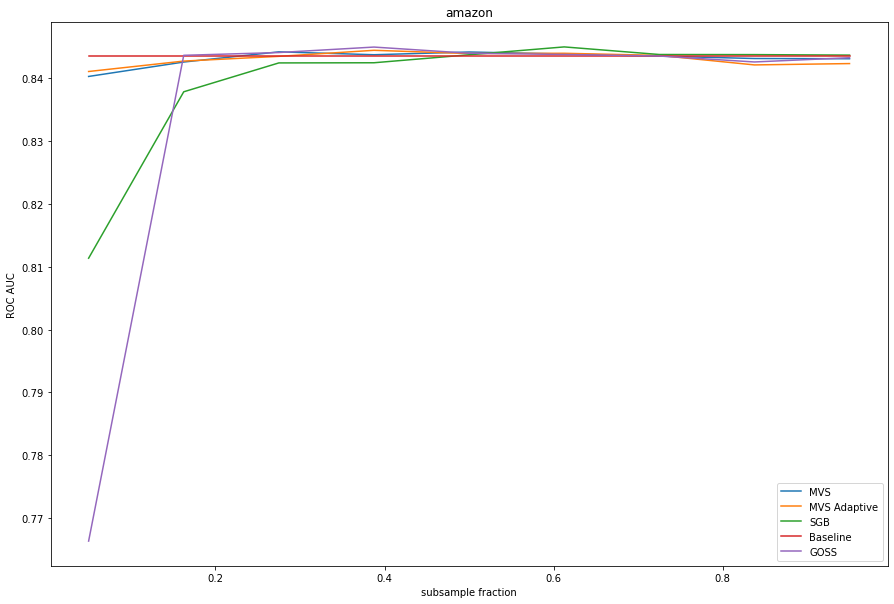

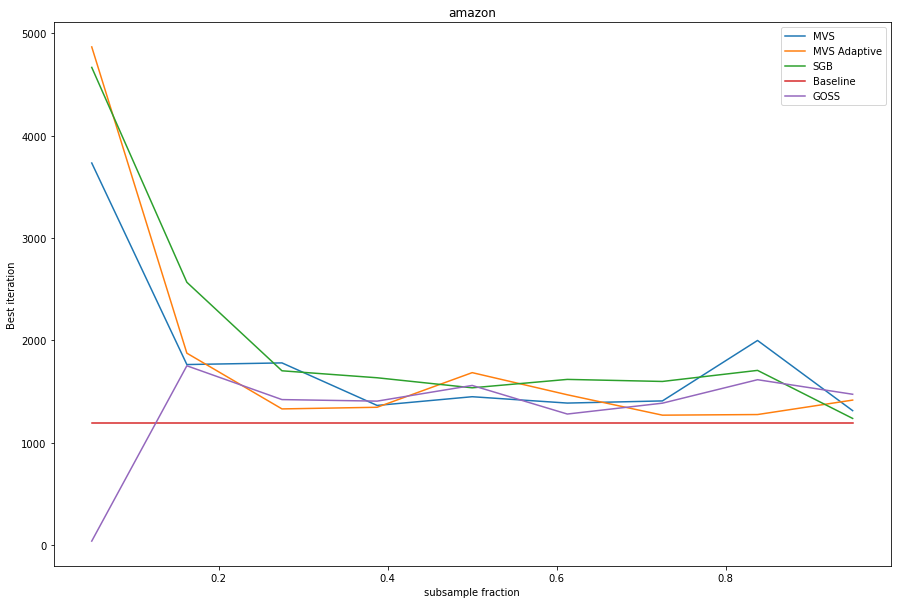

Running experiments on dataset kick
Baseline best auc: [0.7694149469904028]
Running SGB


100%|██████████| 9/9 [02:29<00:00, 16.66s/it]


Running MVS Adaptive


100%|██████████| 9/9 [02:48<00:00, 18.77s/it]


Running MVS


100%|██████████| 9/9 [03:28<00:00, 23.17s/it]


Running Goss


100%|██████████| 9/9 [02:50<00:00, 18.91s/it]


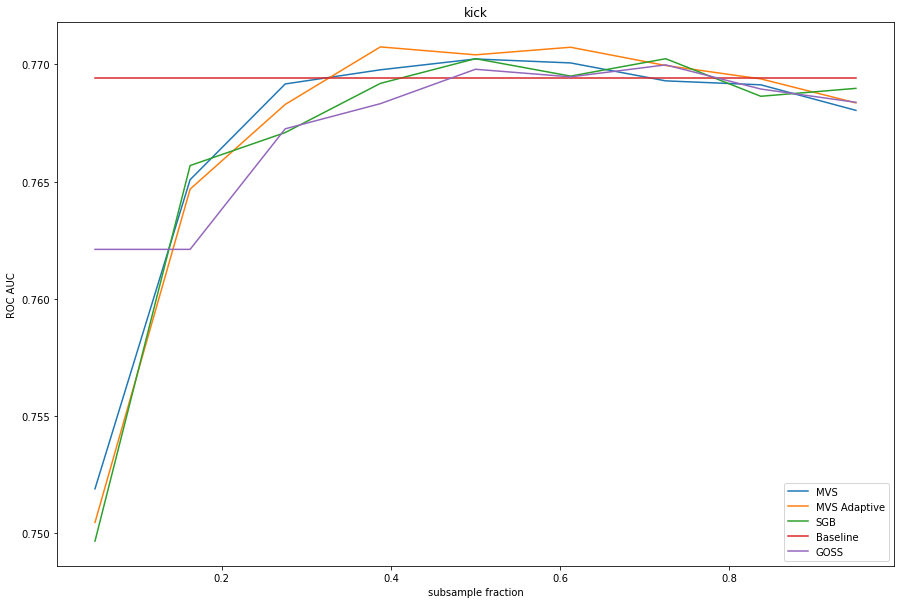

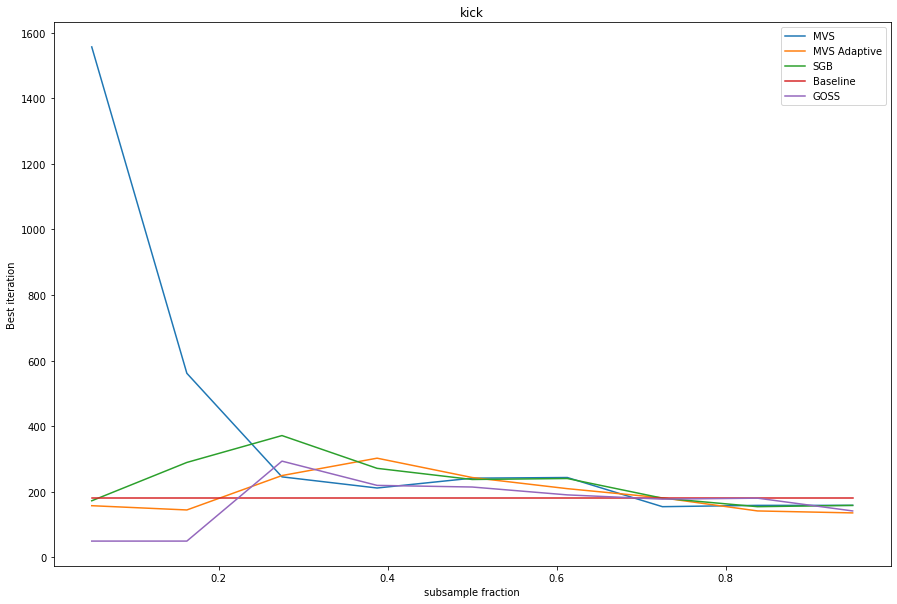

Running experiments on dataset click
Baseline best auc: [0.7221115826843258]
Running SGB


100%|██████████| 9/9 [12:19<00:00, 82.18s/it]


Running MVS Adaptive


100%|██████████| 9/9 [10:35<00:00, 70.63s/it]


Running MVS


100%|██████████| 9/9 [10:51<00:00, 72.41s/it]


Running Goss


100%|██████████| 9/9 [11:00<00:00, 73.38s/it]


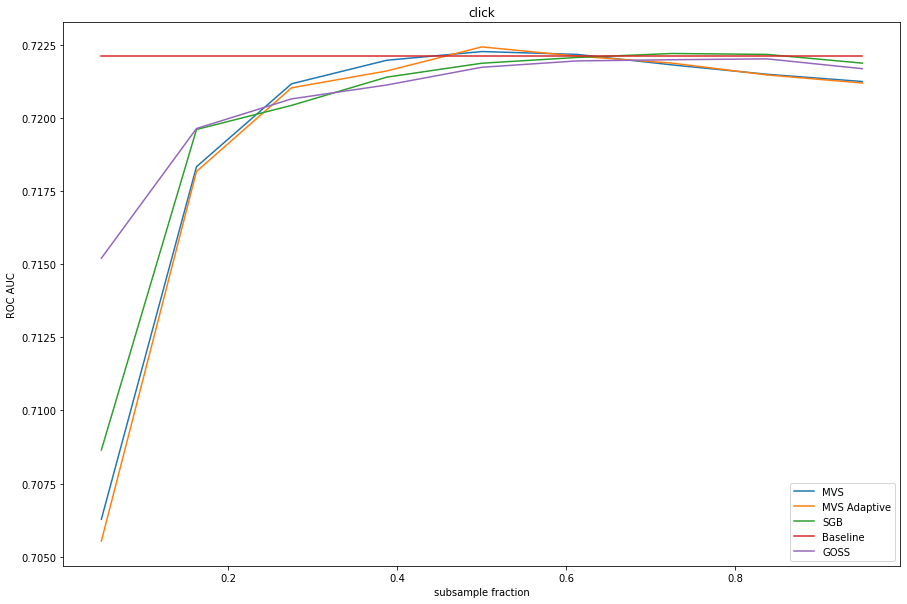

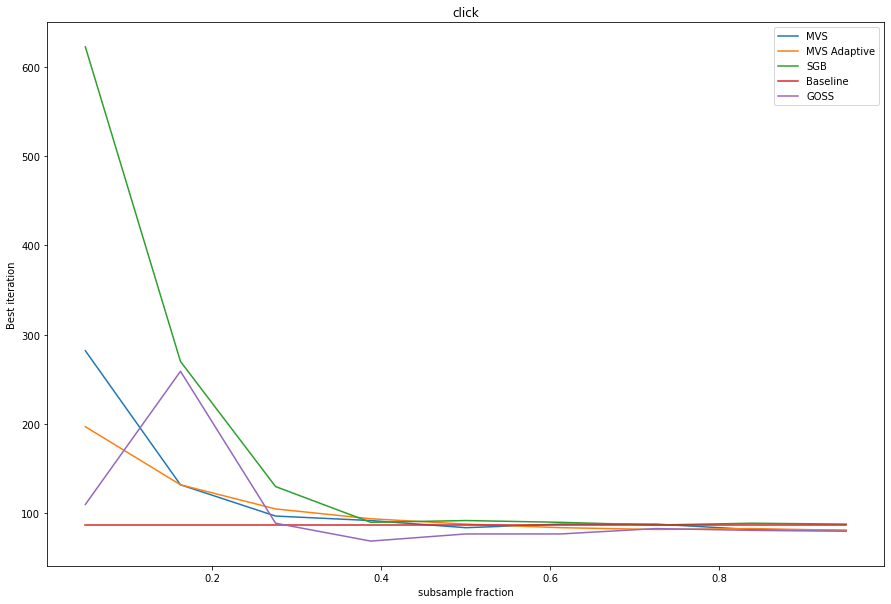

In [14]:
for DATASET_NAME in ["adult", "internet", 'amazon', "kick", "click"]:
    print(f"Running experiments on dataset {DATASET_NAME}")
    hist_baseline = BaselineExperiment(DATASET_NAME).run()
    
    print("Baseline best auc:", get_best(hist_baseline))
    print("Running SGB")
    sgb_hist = SGBExperiment(DATASET_NAME).run()
    
    print("Running MVS Adaptive")
    mvsa_hist = MVSExperiment(DATASET_NAME, mvs_adaptive=True).run()
    
    print("Running MVS")
    mvs_hist = MVSExperiment(DATASET_NAME, mvs_adaptive=False).run()
    print("Running Goss")
    goss_hist = GOSSExperiment(DATASET_NAME).run()

    plt.figure(figsize=(15,10))
    plt.plot([x["params"]['bagging_fraction'] for x in mvs_hist], get_best(mvs_hist), label="MVS")
    plt.plot([x["params"]['bagging_fraction'] for x in mvsa_hist], get_best(mvsa_hist), label="MVS Adaptive")
    plt.plot([x["params"]['bagging_fraction'] for x in sgb_hist], get_best(sgb_hist), label='SGB')
    
    plt.plot([x["params"]['bagging_fraction'] for x in mvs_hist],
             get_best(hist_baseline) * len(mvs_hist), label="Baseline")
    plt.plot([x["params"]['bagging_fraction'] for x in sgb_hist], get_best(goss_hist), label='GOSS')
    plt.legend()
    plt.ylabel("ROC AUC")
    plt.xlabel("subsample fraction")
    plt.title(f"{DATASET_NAME}")
    plt.show()
    
    plt.figure(figsize=(15,10))
    plt.plot([x["params"]['bagging_fraction'] for x in mvs_hist], get_best_iteration(mvs_hist), label="MVS")
    plt.plot([x["params"]['bagging_fraction'] for x in mvsa_hist], get_best_iteration(mvsa_hist), label="MVS Adaptive")
    plt.plot([x["params"]['bagging_fraction'] for x in sgb_hist], get_best_iteration(sgb_hist), label='SGB')
    
    plt.plot([x["params"]['bagging_fraction'] for x in mvs_hist],
             get_best_iteration(hist_baseline) * len(mvs_hist), label="Baseline")
    plt.plot([x["params"]['bagging_fraction'] for x in sgb_hist], get_best_iteration(goss_hist), label='GOSS')
    plt.legend()
    plt.ylabel("Best iteration")
    plt.xlabel("subsample fraction")
    plt.title(f"{DATASET_NAME}")
    plt.show()
    results[DATASET_NAME] = {
                    "baseline": hist_baseline,
                    "mvs": mvs_hist,
                    'sgb': sgb_hist,
                    'goss': goss_hist,
                    'mvs_adaptive': mvsa_hist
                   }

In [23]:
import json
from collections import defaultdict

In [17]:
# with open('results.json','w') as f:
#     json.dump(results,f, indent=4)

In [49]:
table = defaultdict(list)
for dataset in results:
    print(dataset)
    base_line_best_score = get_best(results[dataset]['baseline'])[0]
    print(base_line_best_score)
    
    for model_type in results[dataset]:
        if model_type == 'baseline':
            continue
        score = np.array(get_best(results[dataset][model_type]))
        table[model_type].append((1 - score)/(1-base_line_best_score)-1)

adult
0.929536858892422
internet
0.9565311017059444
amazon
0.8434582232980075
kick
0.7694149469904028
click
0.7221115826843258


In [50]:
for k in table:
    table[k] = np.mean(table[k], axis=0) * 100

In [52]:
df = pd.DataFrame.from_dict(table, orient="index", columns=np.linspace(0.05, 0.95, 9).tolist())

In [55]:
df

,0.0500,0.1625,0.2750,0.3875,0.5000,0.6125,0.7250,0.8375,0.9500
mvs,8.313834,3.031529,0.774616,0.061476,-0.391234,-0.402897,-0.259921,-0.185098,0.083860
sgb,13.037253,4.515698,3.168947,2.569498,2.105423,1.520935,1.079717,0.343415,-0.154705
goss,17.262526,4.672477,3.284850,2.223401,1.196246,0.487760,0.007393,-0.049573,-0.078620
mvs_adaptive,8.314047,2.918980,0.904322,-0.194574,-0.451425,-0.466121,-0.274038,-0.078669,0.205669


In [57]:
df.round(decimals=3).to_csv('./result_quality.csv', sep='|')

In [58]:
!cat ./result_quality.csv

|0.05|0.16249999999999998|0.27499999999999997|0.38749999999999996|0.49999999999999994|0.6125|0.725|0.8374999999999999|0.95
mvs|8.314|3.032|0.775|0.061|-0.391|-0.403|-0.26|-0.185|0.084
sgb|13.037|4.516|3.169|2.569|2.105|1.521|1.08|0.343|-0.155
goss|17.263|4.672|3.285|2.223|1.196|0.488|0.007|-0.05|-0.079
mvs_adaptive|8.314|2.919|0.904|-0.195|-0.451|-0.466|-0.274|-0.079|0.206
